# Data Science Project

## Introduction

The project objective is to  generate knowledge by validating a hypothesis based on the given dataset

To accomplish this, the following is defined:

- **Dataset.** The selected dataset is about soccer which contains information related to each player registered in the FIFA 2017 video game, including statistical information of each player and some personal data


- **Hipothesis to validate.**  Is there any relationship exist among age, nationality, preferred foot, position, date joined to club, data about loaned club, date valid contract, height, weight and release clause to determine value and wage player?

<img src="https://www.freewebheaders.com/wp-content/gallery/football/sports-soccer-stadium-night-scene-web-header.jpg" style="width: 100%"/>

## Pre-processing preparation

### Necessary libraries

The libraries needed to manipulate the dataset are:
- **pandas**
- **re**
- **numpy**

For the predictive model:
- **sklearn**

For plotting figures:
- **matplotlib**
- **seaborn**


In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Dataset to import


As mentioned in the introduction, the variables to extract from the data set are the following:

- ID
- Age
- Nationality
- Club
- Value
- Wage
- Preferred Foot
- Position
- Joined
- Loaned From
- Contract Valid Until
- Height
- Weight
- Release Clause

Those variables are renamed in the dataframe to improve accessibility in the code.

In [3]:
dataframe = (pd.read_csv("futbol.csv")).filter(["ID", "Age", "Nationality","Club","Value", "Wage", "Preferred Foot", "Position", "Joined","Loaned From", "Contract Valid Until", "Height", "Weight", "Release Clause"]).rename(columns={"Preferred Foot":'Preferred_foot', 'Loaned From': 'Loaned_from', 'Contract Valid Until':'Contract_Valid_Until', 'Release Clause': 'Release_clause'})

Dataframe is visualized.

In [4]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


## Data mining

In this secion the dataframe is cleaned to prepare it for data visualization and the predictive model.

### Data cleaning

Columns/variables data types are checked.

In [5]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,int64
Age,int64
Nationality,object
Club,object
Value,object
Wage,object
Preferred_foot,object
Position,object
Joined,object
Loaned_from,object


Due to the variable age is integer type, the maximum and minimum value is found.

In [22]:
pd.DataFrame(dataframe[['Age']].max(), columns=['Valor máximo'])

,Valor máximo
Age,45


In [21]:
pd.DataFrame(dataframe[['Age']].min(), columns=['Valor Mínimo'])

,Valor máximo
Age,16


The same is done for the column ID.

In [23]:
pd.DataFrame(dataframe[['ID']].max(), columns=['Valor máximo'])

,Valor máximo
ID,246620


In [24]:
pd.DataFrame(dataframe[['ID']].min(), columns=['Valor mínimo'])

,Valor mínimo
ID,16


Columns have no negative values and the maximums are known, so it's possible to change the data type to improve performance.

In [8]:
dataframe = dataframe.astype({"ID": np.uint32, 'Age': np.uint8})

Dataframe null data is visualized.

In [9]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,241
Value,0
Wage,0
Preferred_foot,48
Position,60
Joined,1553
Loaned_from,16943


**Important note:** In the situation context, it's possible to assign default values for null data of **Club** and **Realease_clause** columns.

Intersected null data from the following columns are displayed:

- Preferred_foot
- Position
- Joined
- Loaned_from
- Contract_Valid_Until
- Height
- Weight

In [25]:
dataframe[pd.isnull(dataframe[['Preferred_foot', 'Position', 'Joined', 'Loaned_from', 'Contract_Valid_Until','Height', 'Weight']]).all(axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
13236,177971,33,Scotland,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,29,Nicaragua,Boyacá Chicó FC,€300K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,139317,35,England,Notts County,€140K,€3K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,240437,20,Italy,Brescia,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,209462,24,England,Hamilton Academical FC,€400K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,219702,21,Poland,Śląsk Wrocław,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,225590,23,Argentina,Club Atlético Aldosivi,€450K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,233782,19,England,Everton,€600K,€5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,239158,30,Denmark,Hobro IK,€230K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,242998,21,Brazil,HJK Helsinki,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be inferred that the null data rows are the same in **Weight**, **Height** and **Position** columns, these rows can be deleted from any mentioned columns.

In [11]:
dataframe.dropna(subset=['Position'], inplace=True)

Dataframe is displayed.

In [12]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Null data is checked again.

In [13]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,229
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1493
Loaned_from,16883


**Nota importante:** It's not validated but it's possible to think that null data in **Club** and **Contract_Valid_Until** columns are the same.

Remaining columns which is not possible to assign default values are the following:

- Joined
- Loaned_from
- Contract_Valid_Until

Intersected null data from these columns are shown:

In [14]:
dataframe[pd.isnull(dataframe[['Joined', 'Loaned_from', 'Contract_Valid_Until']]).all(axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
452,207439,24,Argentina,NaN,€0,€0,Right,CM,NaN,NaN,NaN,5'11,165lbs,NaN
538,156713,33,Sweden,NaN,€0,€0,Right,LCB,NaN,NaN,NaN,6'4,185lbs,NaN
568,229909,26,Russia,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN
677,187347,29,Russia,NaN,€0,€0,Right,RB,NaN,NaN,NaN,5'10,154lbs,NaN
874,187607,29,Russia,NaN,€0,€0,Right,ST,NaN,NaN,NaN,6'5,201lbs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,225489,23,Iceland,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'5,187lbs,NaN
16976,236774,21,India,NaN,€0,€0,Left,LW,NaN,NaN,NaN,5'9,154lbs,NaN
17008,234234,27,Bulgaria,NaN,€0,€0,Right,LDM,NaN,NaN,NaN,6'0,163lbs,NaN
17197,245164,21,India,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN


It's possible to infer that all rows are from **Contract_Valid_Until** column, therefore such data is removed.

In [15]:
dataframe.dropna(subset=['Contract_Valid_Until'], inplace=True)

Dataframe is displayed.

In [16]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Remaining null data are shown.

In [17]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1264
Loaned_from,16654


**Nota importante:** By observing the dataset, it's possible to conclude that **Joined** column is exclusive **Loaned From**.

To validate the last  statement, **Loaned_from** column null data are displayed along  not null data from the **Joined** column

In [18]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


**Nota importante:** partiendo de la comprobación anterior, se puede verificar que el tamaño de los registros intersectados son iguales al tamaño del dataframe.

As it seems all the rows are shown, it does the following for last validation:
- Shape of the null data from **Loaned_from** and not null data from **Joined** is the same shape from dataframe.

In [19]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False].values.shape == dataframe.shape

True

Una vez comprobado, validado y verificado la relación de excluyencia entre las columnas **Joined** y **Loaned_from**, es necesario realizar las modificaciones a los datos presentes en estes. Sin embargo, se necesita tener en cuenta lo siguiente:

- Las columnas son una cadena de texto con información compleja.
- La columna **Joined** se refiere a la fecha que el jugador se unió al club al que pertenece actualmente.
- La columna **Loaned_from** se refiere al club al que fue prestado incluyendo la fecha.

Las modificaciones propuestas consisten en realizar un renombrado de la columna **Joined** a **Loaned**, que sea de tipo booleana y que indiquen si un jugador está en préstamo (valor true indica que hay información en la columna **Loaned_from** y false indica que hay información en la columna **Joined**).

Como primer paso de las modificaciones propuestas, se renombra la columna **Joined** a **Loaned**.

In [20]:
dataframe.rename({'Joined': 'Loaned'}, axis=1, inplace=True)

Posteriormente, se reemplazan los registros de la columna **Loaned** (anteriormente Joined) partiendo del siguiente criterio:
- Si presenta información entonces el nuevo valor del registro es true.
- Si no presenta información entonces el nuevo valor del registro es false.

In [21]:
dataframe.Loaned = dataframe.Loaned.isnull()

Para comprobar que la operación haya provisto el remplazo esperado, se procede a visualizar la siguiente intersection de los registros de acuerdo a los siguientes datos:
- La columna **Loaned** en true
- La columna **Loaned_from** con registros nulos o vacios.

In [22]:
dataframe[dataframe.Loaned == True].head(n=10)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,Real Madrid,"Jun 30, 2019",5'11,172lbs,NaN
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,Juventus,"Jun 30, 2019",6'1,196lbs,NaN
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,FC Barcelona,"Jun 30, 2019",6'0,157lbs,NaN
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,SL Benfica,"Dec 31, 2018",6'3,176lbs,NaN
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,Real Madrid,"Jun 30, 2019",5'9,172lbs,NaN
332,216409,24,Italy,Inter,€22.5M,€57K,Left,RM,True,Sassuolo,"Jun 30, 2019",5'7,148lbs,NaN
354,203890,26,Croatia,Inter,€18M,€57K,Right,RB,True,Atlético Madrid,"Jun 30, 2019",5'11,168lbs,NaN
357,202685,27,Italy,Torino,€21M,€48K,Left,RS,True,Valencia CF,"Jun 30, 2019",6'1,185lbs,NaN
427,226226,22,Argentina,Real Betis,€20M,€72K,Left,RCM,True,Paris Saint-Germain,"Jun 30, 2019",5'9,154lbs,NaN
434,219809,23,France,Milan,€17M,€85K,Right,LCM,True,Chelsea,"Jun 30, 2019",6'2,187lbs,NaN


Posteriormente, se visualiza la siguiente intersection de los registros de acuerdo a los siguientes datos:
- La columna **Loaned** en false
- La columna **Loaned_from** con registros nulos o vacios.

In [23]:
dataframe[dataframe.Loaned == False].head(n=10)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,NaN,2023,5'11,154lbs,€196.4M
5,183277,27,Belgium,Chelsea,€93M,€340K,Right,LF,False,NaN,2020,5'8,163lbs,€172.1M
6,177003,32,Croatia,Real Madrid,€67M,€420K,Right,RCM,False,NaN,2020,5'8,146lbs,€137.4M
7,176580,31,Uruguay,FC Barcelona,€80M,€455K,Right,RS,False,NaN,2021,6'0,190lbs,€164M
8,155862,32,Spain,Real Madrid,€51M,€380K,Right,RCB,False,NaN,2020,6'0,181lbs,€104.6M
9,200389,25,Slovenia,Atlético Madrid,€68M,€94K,Right,GK,False,NaN,2021,6'2,192lbs,€144.5M


Partiendo de lo anterior, se puede corroborar de forma consistente que la operación de reemplazamiento de los registros de la columna **Loaned** ha sido lo esperado.

Tomando lo mencionado, se procede a eliminar la columna **Loaned_from** debido a que su información se incluye en la columna **Loaned** de forma consistente.

In [24]:
dataframe.drop(['Loaned_from'], axis=1, inplace=True)

Seguido a esto, se visualiza el dataframe.

In [25]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,False,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,False,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,False,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,False,2019,5'10,154lbs,€143K


Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [26]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Nota importante:** se puede observar que solamnente la columna **Release_clause** es la que contiene valores nulos o vacios.

Partiendo del contexto, los valores nulos o vacios existentes en los registros de la columna **Release_clause** puede inferir a que sea una cláusula de recesión de 0 euros, se procede a reemplazar los valores de los registros por una cadena "0".

In [27]:
dataframe.loc[dataframe.Release_clause.isnull(),'Release_clause']='€0M'

Posteriormente, se comprueba que sean los mismos registros presentes en la columna **Release_clause** a los que se hayan reemplazado su valor nulo con la cadena "0".

In [28]:
dataframe[dataframe.Release_clause =='€0M']

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,"Jun 30, 2019",5'11,172lbs,€0M
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,"Jun 30, 2019",6'1,196lbs,€0M
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,"Jun 30, 2019",6'0,157lbs,€0M
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,"Dec 31, 2018",6'3,176lbs,€0M
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,"Jun 30, 2019",5'9,172lbs,€0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,241341,21,China PR,Guizhou Hengfeng FC,€60K,€2K,Right,CM,True,"Dec 31, 2018",6'0,172lbs,€0M
18026,241444,21,China PR,Guizhou Hengfeng FC,€50K,€2K,Right,LM,True,"Dec 31, 2018",5'10,143lbs,€0M
18031,243506,20,China PR,Stabæk Fotball,€40K,€2K,Right,RB,True,"Dec 31, 2018",5'7,143lbs,€0M
18056,244872,19,Italy,Ascoli,€60K,€3K,Left,CM,True,"Jun 30, 2019",5'10,143lbs,€0M


**Nota importante:** se puede observar que es la misma cantidad de los valores nulos o vacios iniciales de la columna **Release_clause** a los que se reemplazo con la cadena "0".

Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [29]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Nota importante:** se puede observar que ya no existen todos los valores nulos o vacios en todas las columnas del dataframe.

Una vez modificado los valores nulos o vacios, se procede a se analizar el tipo de dato de todas las columnas del dataframe.

In [30]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,uint32
Age,uint8
Nationality,object
Club,object
Value,object
Wage,object
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,object


**Nota importante:** se puede observar que todas las columnas corresponden a su tipo de dato con la excepción de las columnas **Value**, **Wage**, **Height** y **Release_clause** son tipo cadena (object), cuando realmente estos deberian ser de tipo numérico (int64).

Como primer paso, se procede a convertir las columnas **Value**, **Wage** y **Release_clause** que representan una cantidad de dinero evaluado en euros. Estos contienen de forma adicional lo siguiente:
- Signo de euro (€).
- Posfijo de miles (K) o millones (M).

Seguidamente, se comprueba que todos los registros posean un formato antes mencionado.

In [31]:
all(dataframe[['Value','Wage','Release_clause']].apply(lambda series:[re.fullmatch('€(([1-9]|[1-9][0-9]|[1-5][0-9]{2}|600)(?:\.[0-9]{1,2}){0,1}[MK]|0)', value) for value in series]))

True

Una vez comprobado, se procede a eliminar los caracteres innecesarios y a convertir de forma inmediata los valores de miles o millones asi como tambien definir el nuevo valor de tipo flotante para los registros existentes de las columnas **Value**, **Wage** y **Release Clause**.

In [32]:
np.uint32(dataframe[['Value','Wage', 'Release_clause']].apply(lambda series: [np.float16(tupla[1])*1000
           if ('M' in tupla[0]) else tupla[1] for tupla in [(value,re.findall('(\d+(?:\.\d+)?)', value)[0]) for value in series]]))

array([[110500,    565, 226500],
       [ 77000,    405, 127125],
       [118500,    290, 228125],
       ...,
       [    60,      1,    165],
       [    60,      1,    143],
       [    60,      1,    165]], dtype=uint32)

In [33]:
dataframe[['Value','Wage', 'Release_clause']] = np.uint32(dataframe[['Value','Wage', 'Release_clause']].apply(lambda series: [tupla[1]*1000
    if ('M' in tupla[0]) else tupla[1] for tupla in [(value, np.float16(re.findall('(\d+(?:\.\d+)?)', value)[0])) for value in series]]))

Como segundo paso, se procede a convertir las columna **Weight** que representan una cantidad de peso evaluado en libras. Estos contienen de forma adicional lo siguiente:
- Posfijo de libra (lbs).

Posteriormente, se comprueba que todos los registros posean un formato antes mencionado.

Validamos que cumpla la siguiente expresión regular con la intención de validar que se cumpla la sintaxis de "(80-230)lbs" para saber que no haya ningún jugador con más peso de 250 libras

In [34]:
all([re.fullmatch('((8\d|9\d|1\d{2}|2[0-4]\d|250))lbs', value) for value in dataframe.Weight])

True

Una vez comprobado, se procede a eliminar los caracteres innecesarios y a definir el nuevo valor de tipo flotante de la columna **Weigth**.

In [49]:
dataframe.Weight = np.uint8((dataframe.Weight.apply(lambda x: re.findall('(\d+(?:\.\d+)?)', x)[0])))

Como tercer paso, se procede a convertir las columna **Height** que representan una cantidad de altura evaluado en pulgadas. Estos contienen de forma adicional lo siguiente:
- Infijo de pulgadas (').

Seguidamente, se comprueba que todos los registros posean un formato antes mencionado.

In [50]:
all([re.fullmatch('[0-7]\'(1[0-2]|\d)', value) for value in dataframe.Height])

True

Una vez comprobado, se procede a reemplazar el caracter de pulgada, convertir y definir el nuevo valor de tipo flotante de la columna **Heigth**.

Verificar que no haya algún jugador con datos erróneos de


In [51]:
dataframe.Height = [np.uint8(y[0]*12+y[1]) for y in [[np.uint8(y) for y in x.split("'")] for x in dataframe.Height]]

**Nota importante:** la conversión aplicada es necesaria para poder interpretar de forma correcta el valor de altura compuesta.

Como cuarto paso, se procede a convertir las columna **Contract_Valid_Until** que representan una fecha pero sin un formato establecido. Estos contienen de forma adicional lo siguiente:
- Mes (3 caracteres).
- Dia (1 a 2 caracteres).
- Año (4 caracteres).

Seguidamente, se comprueba que todos los registros posean por lo mínimo el año del contrato. Al tener otro texto algunas celdas, se decide por solamente encontrar alguna parte de dicho valor que pueda encontrar la expresión regular

In [52]:
all([re.findall('(201[5-9]|202[0-6])', x) for x in dataframe.Contract_Valid_Until])

True

Una vez comprobado, se procede a eliminar los caracteres innesesarios y a definir el nuevo valor de tipo entero de la columna **Contract_Valid_Until**.

In [53]:
dataframe.Contract_Valid_Until = dataframe.Contract_Valid_Until.apply(lambda x: np.uint16(re.findall('20[1-2][0-9]', x)[0]))

Por ultimo, se procede a comprobar los registros de la columna **Preferred_foot**.

In [54]:
pd.DataFrame((lambda x:{'Preferred_foot':x.index})(dataframe.Preferred_foot.value_counts()))

,Preferred_foot
0,Right
1,Left


**Nota importante:** se puede observar que esta columna solamente contiene valores entre las cadenas "Left" o "Righ".

Finalmente, se comprueba el tipo de dato de cada columna del dataframe.

In [55]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,uint32
Age,uint8
Nationality,object
Club,object
Value,uint32
Wage,uint32
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,int16


Seguido a esto, se visualiza el dataframe.

In [56]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60,1,Right,CM,False,2019,69,134,143
18203,243165,19,Sweden,Trelleborgs FF,60,1,Right,ST,False,2020,75,170,113
18204,241638,16,England,Cambridge United,60,1,Right,ST,False,2021,68,148,165
18205,246268,17,England,Tranmere Rovers,60,1,Right,RW,False,2019,70,154,143


In [57]:
dataframe.Height.max()

81

**Nota importante:** se puede observar que las modificaciones han dado como resultado la reducción una columna y el completado de los datos en los valores de registros que antes contenian valores nulos o vacios.

## Normalización de los registros de datos

Partiendo de los datos modificados, se procede a crear una copia del dataframe con el objetivo de modificar los datos para posteriormente normalizarlos, pero sin modificar el dataframe original.

In [58]:
normalizedDataframe = dataframe.copy()

Se visualiza la copia del dataframe creado.

In [59]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60,1,Right,CM,False,2019,69,134,143
18203,243165,19,Sweden,Trelleborgs FF,60,1,Right,ST,False,2020,75,170,113
18204,241638,16,England,Cambridge United,60,1,Right,ST,False,2021,68,148,165
18205,246268,17,England,Tranmere Rovers,60,1,Right,RW,False,2019,70,154,143


**Nota importante:** debido a que existen columnas del dataframe de tipo cadena estos no se pueden normalizar, por lo que se requiere crear subconjunto de datos para relacionar estos valores para que posteriormente sean normalizados.

Como primer paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Nationality**.

In [60]:
countryDataframe = pd.DataFrame((lambda x:{'Nationality':x.index, 'Frequency':x.values.astype('uint16')})(dataframe.Nationality.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [61]:
countryDataframe

,Nationality,Frequency
0,England,1657
1,Germany,1195
2,Spain,1071
3,Argentina,935
4,France,911
...,...,...
158,Guam,1
159,Fiji,1
160,Liberia,1
161,Mauritius,1


Como segundo paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Club**.

In [62]:
clubDataframe = pd.DataFrame((lambda x:{'Club':x.index, 'Frequency':x.values.astype('uint16')})(dataframe.Club.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [63]:
clubDataframe

,Club,Frequency
0,FC Barcelona,33
1,Southampton,33
2,Cardiff City,33
3,TSG 1899 Hoffenheim,33
4,Wolverhampton Wanderers,33
...,...,...
646,Vitória,20
647,Paraná,20
648,Sligo Rovers,19
649,Limerick FC,19


Como tercer paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Preferred_foot**.

In [64]:
preferredFootDataframe = pd.DataFrame((lambda x:{'Preferred_foot':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Preferred_foot.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [65]:
preferredFootDataframe

,Preferred_foot,Frequency
0,Right,13756
1,Left,4162


Como cuarto paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Position**.

In [66]:
positionDataframe = pd.DataFrame((lambda x:{'Position':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Position.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [67]:
positionDataframe

,Position,Frequency
0,ST,2130
1,GK,1992
2,CB,1754
3,CM,1377
4,LB,1305
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,948
9,CDM,936


Como quinto paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Loaned**.

In [68]:
loanedDataframe = pd.DataFrame((lambda x:{'Loaned':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Loaned.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [69]:
loanedDataframe

,Loaned,Frequency
0,False,16654
1,True,1264


Como ultimo paso, se indexa las columnas **Nationality**, **Club**, **Preferred_foot**, **Position** y **Loaned** con los subconjuntos de datos creados en los pasos anteriores, esto sustituyendo los valores del nuevo dataframe con los nuevos pertenecienctes en los subconjuntos.

In [70]:
for tupla in {'Nationality': countryDataframe, 'Club':clubDataframe, 'Preferred_foot':preferredFootDataframe, 'Position':positionDataframe, 'Loaned':loanedDataframe}.items(): normalizedDataframe[tupla[0]] = dataframe[tupla[0]].apply(lambda x:(tupla[1][tupla[0]].loc[tupla[1][tupla[0]] == x].index[0]))

Finalmente, se procede a normalizar todos los registros de todas las columnas del nuevo dataframe.

In [71]:
normalizedDataframe = pd.DataFrame(MinMaxScaler().fit_transform(normalizedDataframe).astype('float32'), columns=normalizedDataframe.columns)

Se procede a visualizar el nuevo dataframe con los registros normalizados.

In [72]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,0.640732,0.517241,0.018519,0.000000,0.932489,1.000000,1.0,0.961538,0.0,0.375,0.30,0.368421,0.992877
1,0.084285,0.586207,0.129630,0.860000,0.649789,0.716312,0.0,0.000000,0.0,0.500,0.65,0.548872,0.557260
2,0.773933,0.344828,0.030864,0.224615,1.000000,0.512411,0.0,0.538462,0.0,0.500,0.40,0.300752,1.000000
3,0.782891,0.379310,0.012346,0.035385,0.607595,0.459220,0.0,0.038462,0.0,0.250,0.75,0.436090,0.607671
4,0.782506,0.379310,0.154321,0.036923,0.860759,0.627660,0.0,0.500000,0.0,0.625,0.50,0.330827,0.860822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,0.968342,0.103448,0.000000,0.455385,0.000506,0.000000,0.0,0.115385,0.0,0.125,0.40,0.180451,0.000627
17914,0.985990,0.103448,0.061728,0.578462,0.000506,0.000000,0.0,0.000000,0.0,0.250,0.70,0.451128,0.000495
17915,0.979798,0.000000,0.000000,0.463077,0.000506,0.000000,0.0,0.000000,0.0,0.375,0.35,0.285714,0.000723
17916,0.998573,0.034483,0.000000,0.583077,0.000506,0.000000,0.0,0.576923,0.0,0.125,0.45,0.330827,0.000627


## Visualización de los registros de datos

Partiendo del dataframe normalizados, se procede a generar gráficas con el objetivo de observar de forma visual el comportamiento de los datos.

Como primer paso, se visualiza las graficas de tipo histograma de todas las columnas del dataframe normalizado.

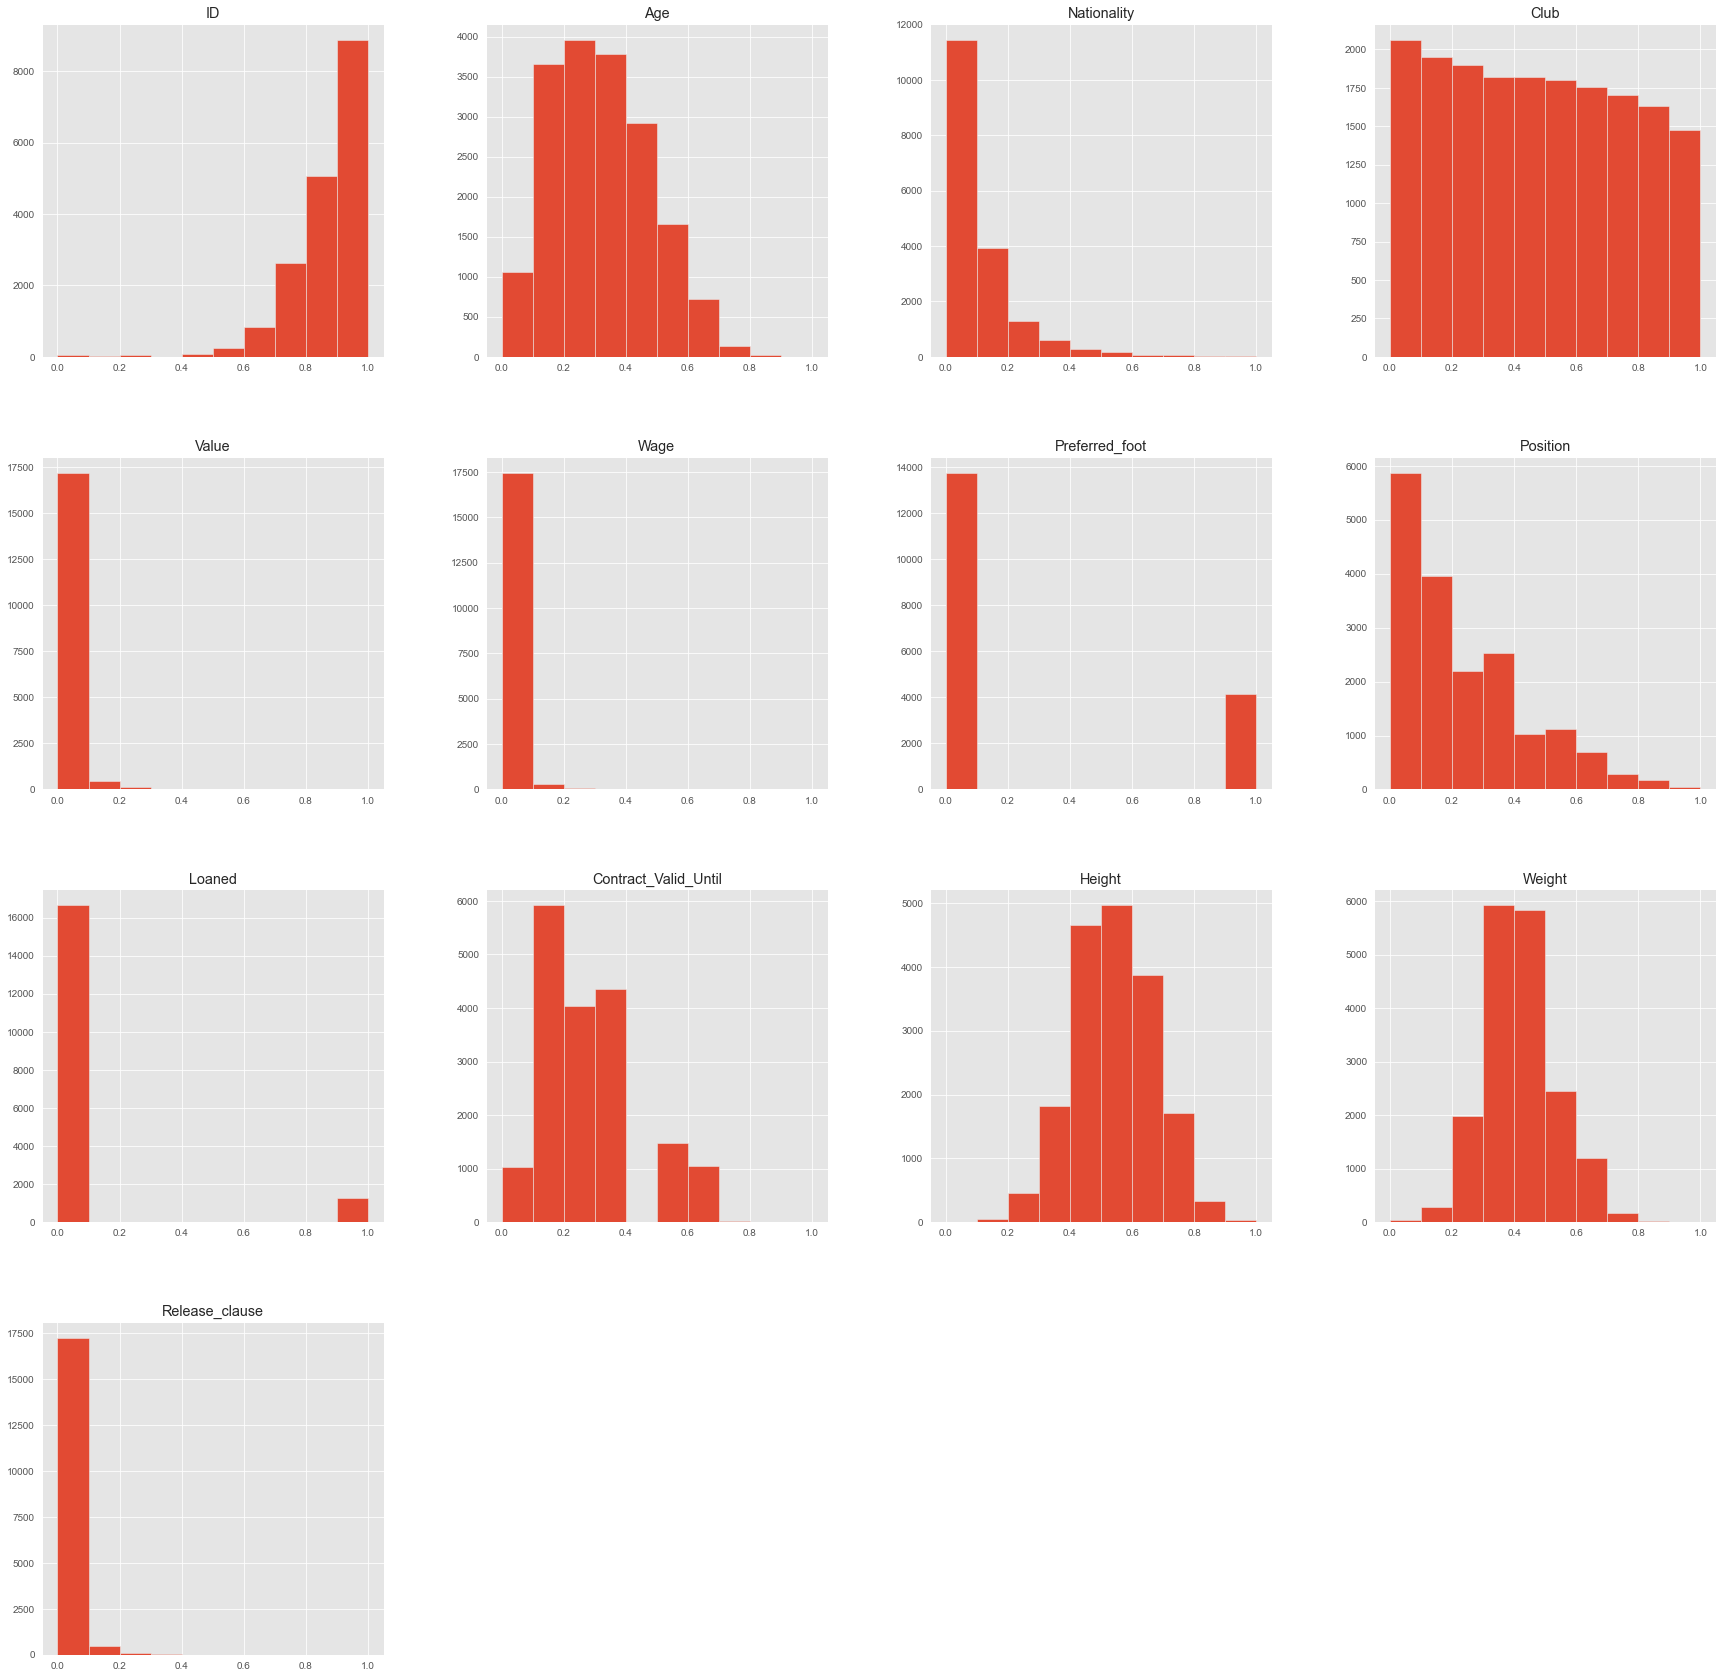

In [73]:
normalizedDataframe.hist(figsize=(30,30))
plt.show()

Como segundo paso, se visualiza las gráficas de tipo dispersión todas las columnas a excepción de la columna **ID** común.

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Age**.

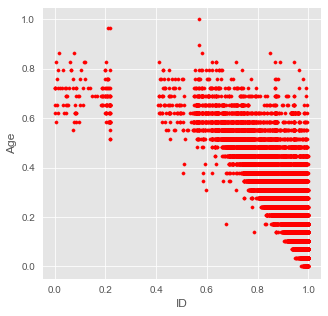

In [74]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Age', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Nationality**.

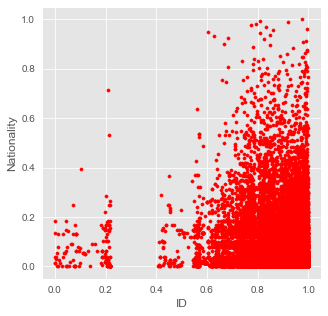

In [75]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Nationality', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Club**.

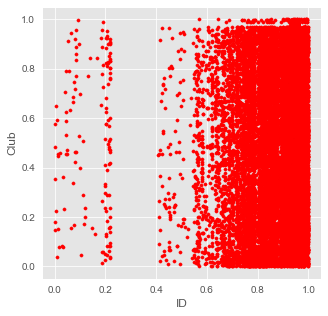

In [76]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Club', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Value**.

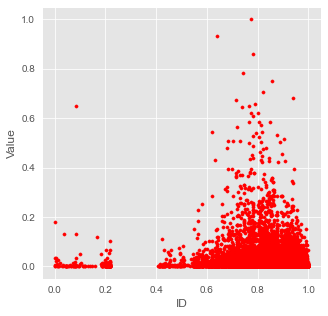

In [77]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Value', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Wage**.

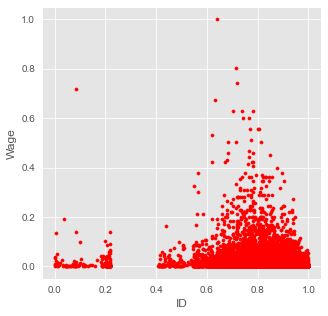

In [78]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Wage', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Preferred_foot**.

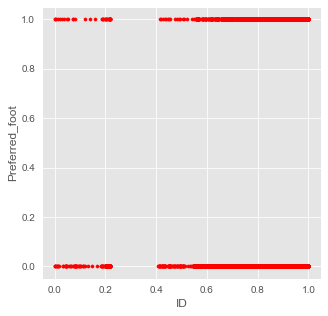

In [79]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Preferred_foot', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Position**.

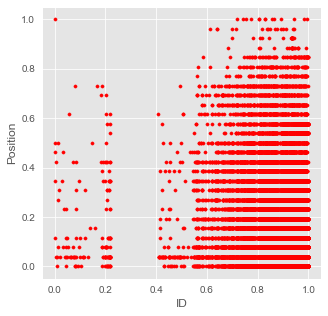

In [80]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Position', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Loaned**.

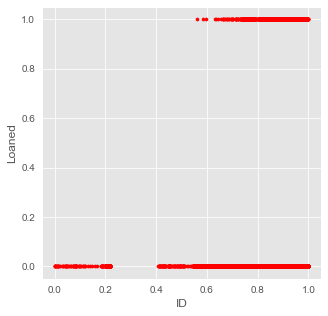

In [81]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Loaned', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Contract_Valid_Util**.

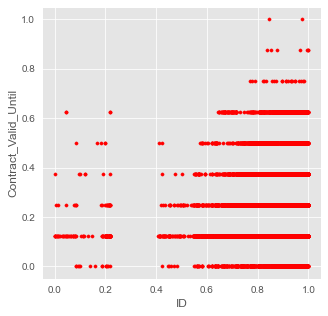

In [82]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Contract_Valid_Until', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Heigth**.

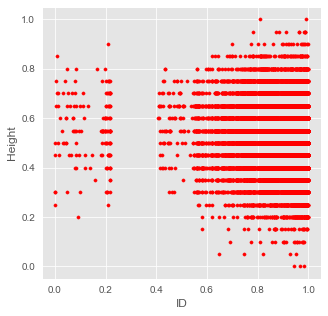

In [83]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Height', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Weight**.

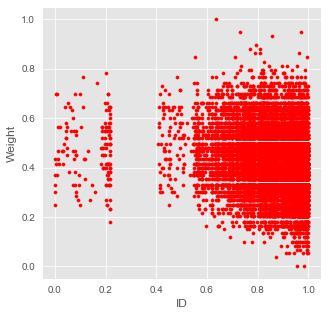

In [84]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Weight', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

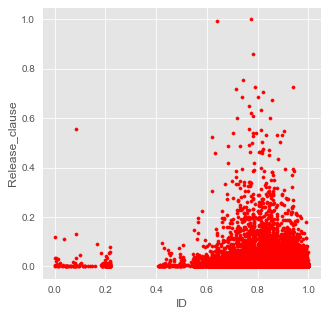

In [85]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Release_clause', s = 10, c = 'red', figsize=(5,5))
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

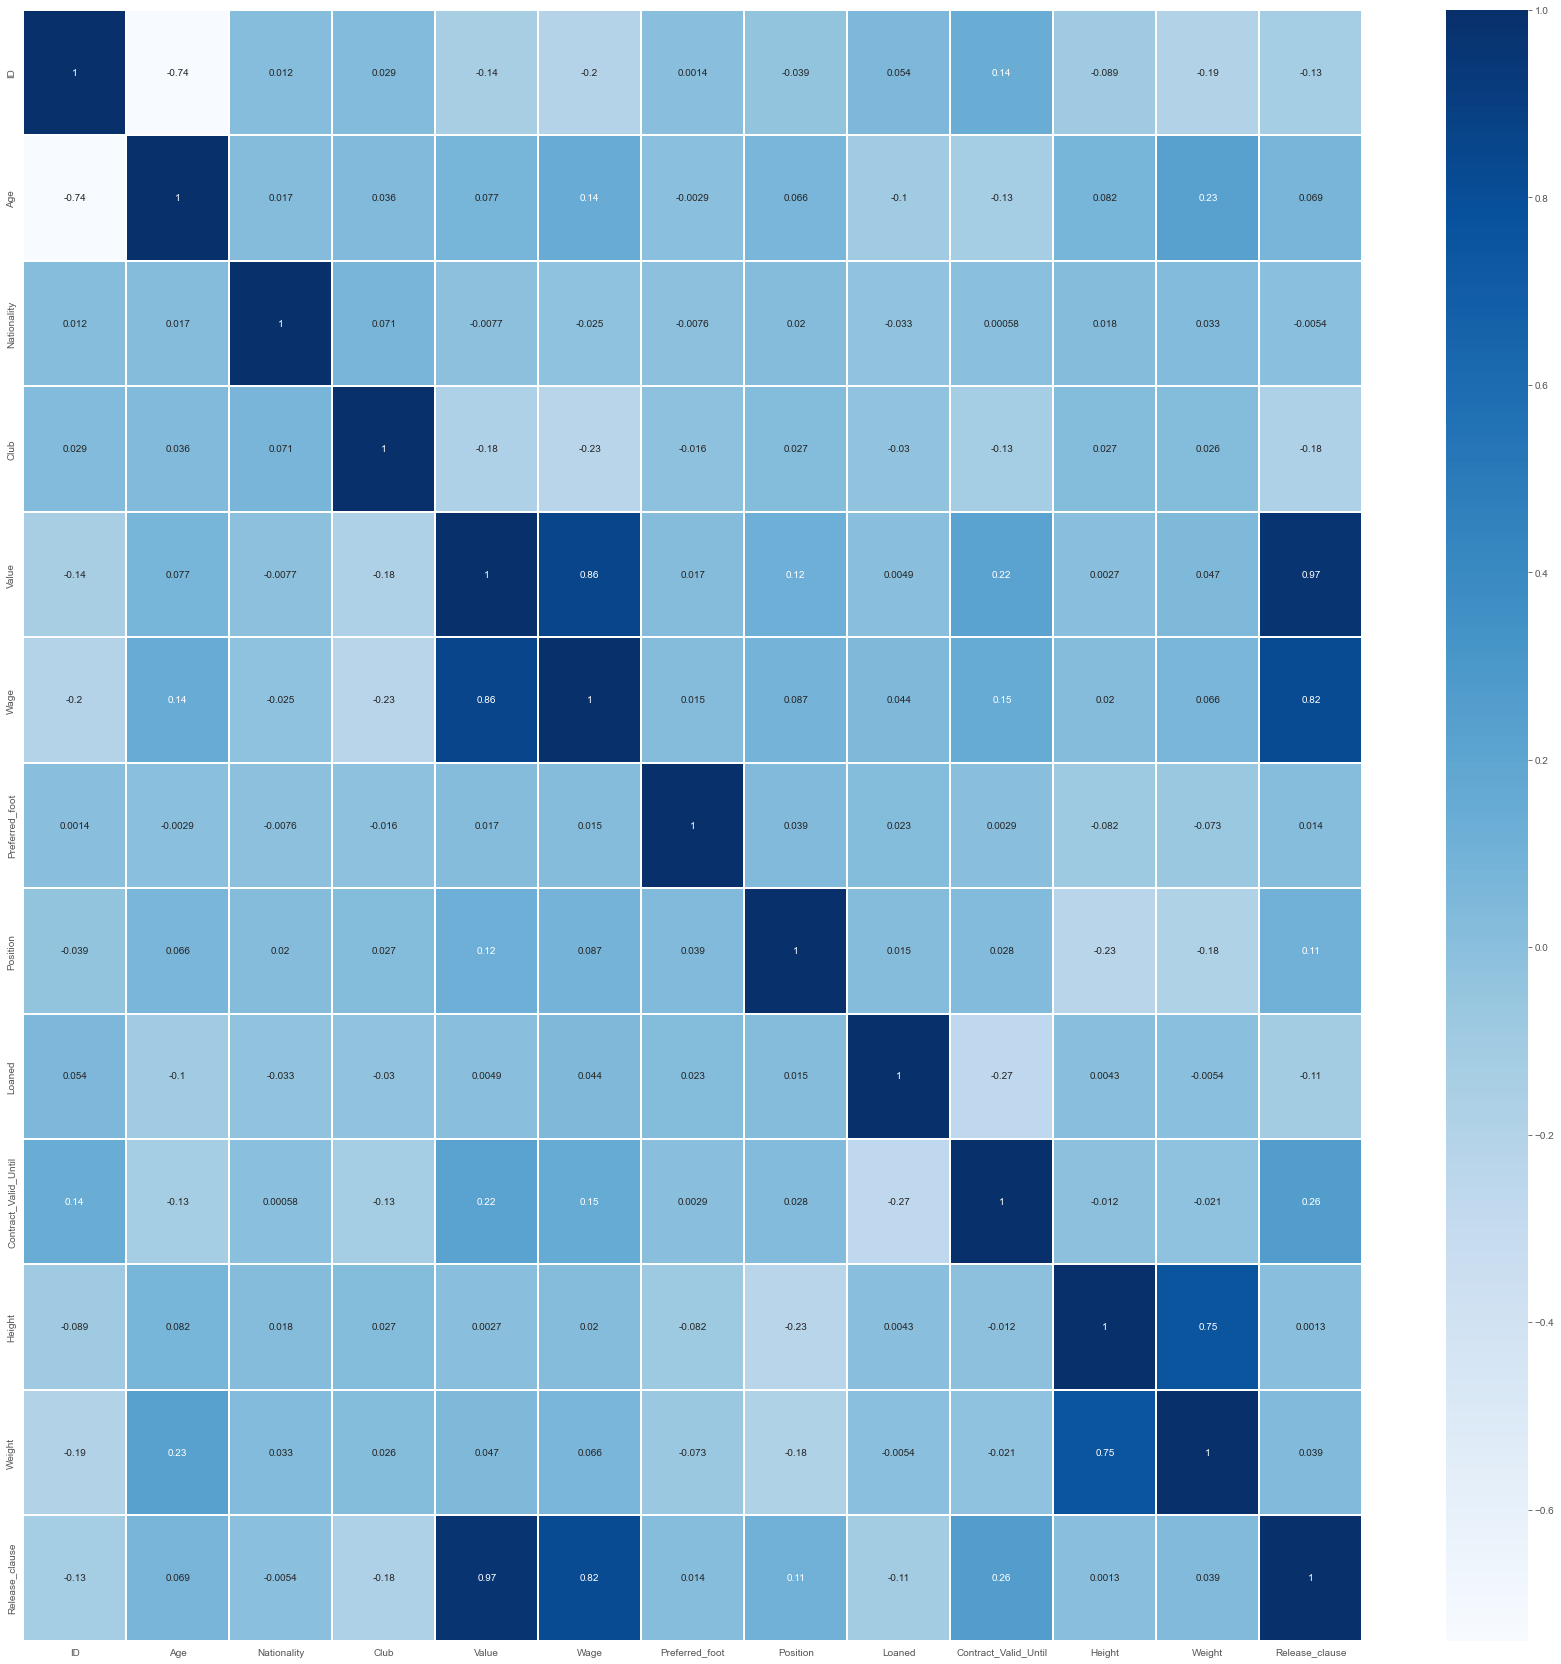

In [86]:
plt.figure(figsize=(30,30))
sb.heatmap(normalizedDataframe.corr(), cmap ='Blues', linewidths = 0.30, annot = True)
plt.show()

## Predictive modelling